### Data Source:
+ https://catalog.data.gov/dataset/employee-salaries-2023
+ Annual salary information including gross pay and overtime pay for all active, permanent employees of Montgomery County, MD paid in calendar year 2023. This information will be published annually each year.

In [83]:
import pandas as pd

##### Reading the Employee Salaries Dataset

In [84]:
df = pd.read_csv('Employee_Salaries.csv')
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


##### Imputing the Missing values in the Grade column with place holder 'Unknown'.

In [86]:
# Data Cleaning: Handling missing values in the 'Grade' column
# We will replace missing values with a placeholder 'Unknown' for now.
df['Grade'].fillna('Unknown', inplace=True)

# Statistical Summary of Numerical Columns
stat_summary = df.describe()

# Checking for the presence of any remaining null values in the dataset
null_values = df.isnull().sum()

stat_summary, null_values


(         Base_Salary   Overtime_Pay  Longevity_Pay
 count   10291.000000   10291.000000   10291.000000
 mean    90312.165744    8081.288954    1533.882816
 std     31240.842929   16491.833017    3209.041070
 min     11147.240000       0.000000       0.000000
 25%     70023.000000       0.000000       0.000000
 50%     87328.000000     258.420000       0.000000
 75%    108084.000000    9190.970000    1225.680000
 max    292000.000000  227428.990000   20279.460000,
 Department         0
 Department_Name    0
 Division           0
 Gender             0
 Base_Salary        0
 Overtime_Pay       0
 Longevity_Pay      0
 Grade              0
 dtype: int64)

#### Base Salary

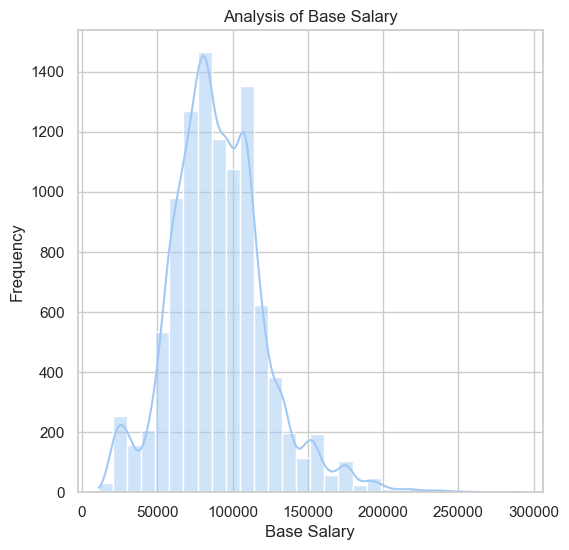

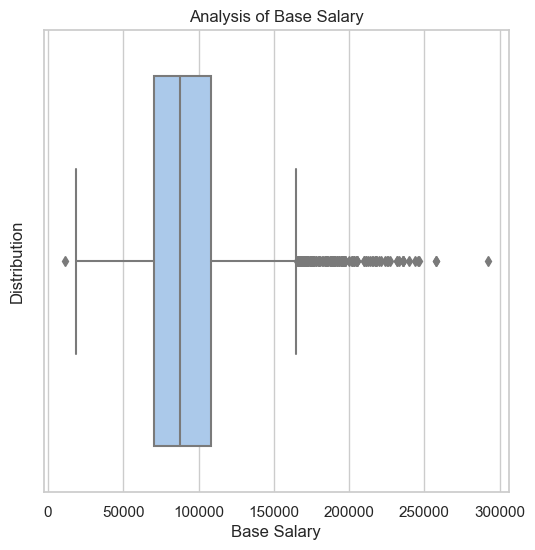

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Base Salary
plt.figure(figsize=(6, 6))
sns.histplot(df['Base_Salary'], bins=30, kde=True)
plt.title('Analysis of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Base Salary
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['Base_Salary'])
plt.title('Analysis of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Distribution')
plt.show()



+ The histogram shows the distribution of base salaries with a right-skewed pattern, indicating higher salaries are less frequent.
+ The corresponding box plot highlights the spread of the data along with outliers, giving a quick view of the salary distribution's range and central tendency.

#### Overtime Pay

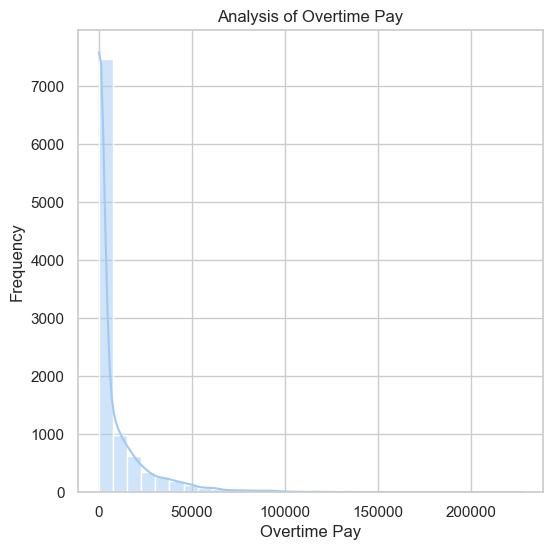

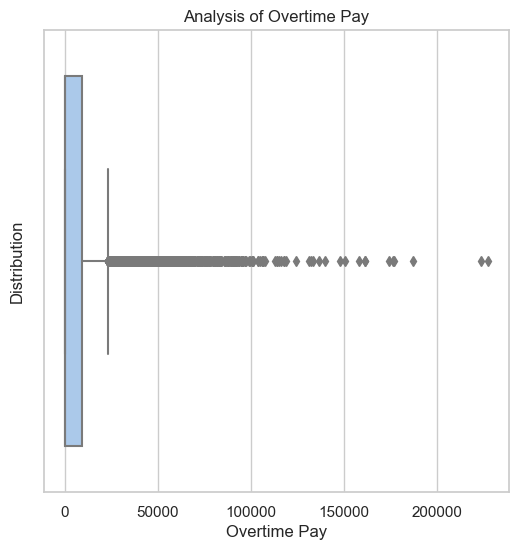

In [88]:
# Histogram of Overtime Pay
plt.figure(figsize=(6, 6))
sns.histplot(df['Overtime_Pay'], bins=30, kde=True)
plt.title('Analysis of Overtime Pay')
plt.xlabel('Overtime Pay')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Overtime Pay
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['Overtime_Pay'])
plt.title('Analysis of Overtime Pay')
plt.xlabel('Overtime Pay')
plt.ylabel('Distribution')
plt.show()


+ The histogram for overtime pay reveals that most employees receive little to no overtime pay, but there are a few significant outliers.
+ The box plot displays these outliers clearly, showing how overtime pay varies much more widely than the base salary.

#### Longevity Pay

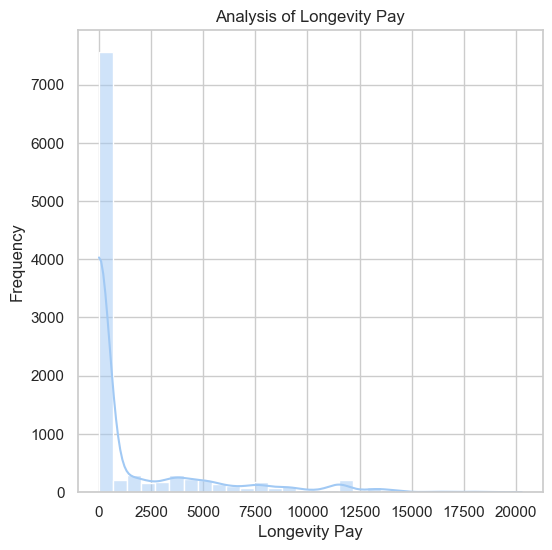

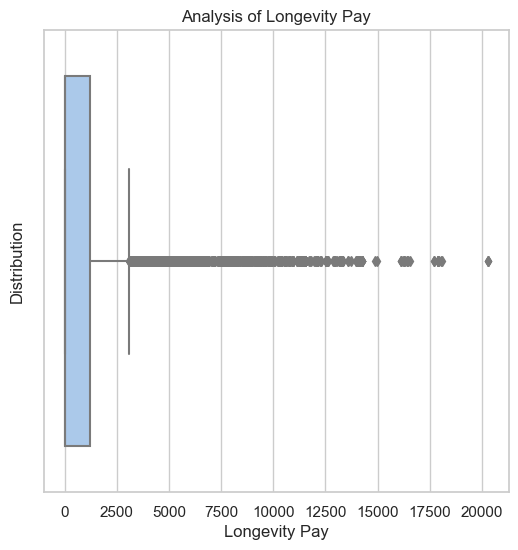

In [89]:
# Histogram of Longevity Pay
plt.figure(figsize=(6, 6))
sns.histplot(df['Longevity_Pay'], bins=30, kde=True)
plt.title('Analysis of Longevity Pay')
plt.xlabel('Longevity Pay')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Longevity Pay
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['Longevity_Pay'])
plt.title('Analysis of Longevity Pay')
plt.xlabel('Longevity Pay')
plt.ylabel('Distribution')
plt.show()



+ The histogram indicates that longevity pay is non-existent for a large segment of employees, with some exceptions showing higher amounts.
+ The box plot similarly shows a concentration of data points at lower values with a few high outliers.

#### Top 20 Departments by Number of Employees

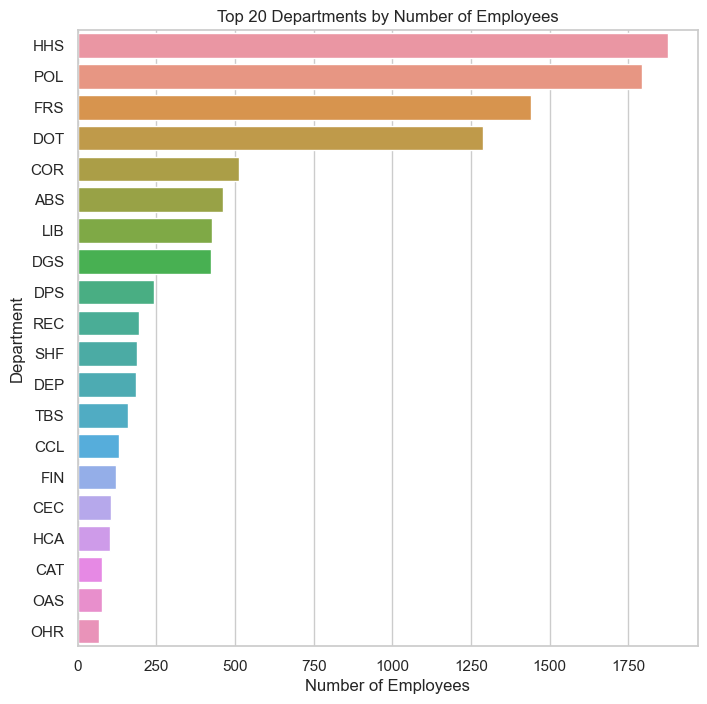

In [90]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid", palette="pastel")

# Bar Plot for Department (top 20 departments by frequency)
top_departments = df['Department'].value_counts().head(20)
plt.figure(figsize=(8, 8))
sns.barplot(x=top_departments.values, y=top_departments.index)
plt.title('Top 20 Departments by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()


+ This analysis shows which departments have the most employees. It shows that Department of Health and Human Services has the highest number of employees.

#### Top 20 Divisions by Number of Employees

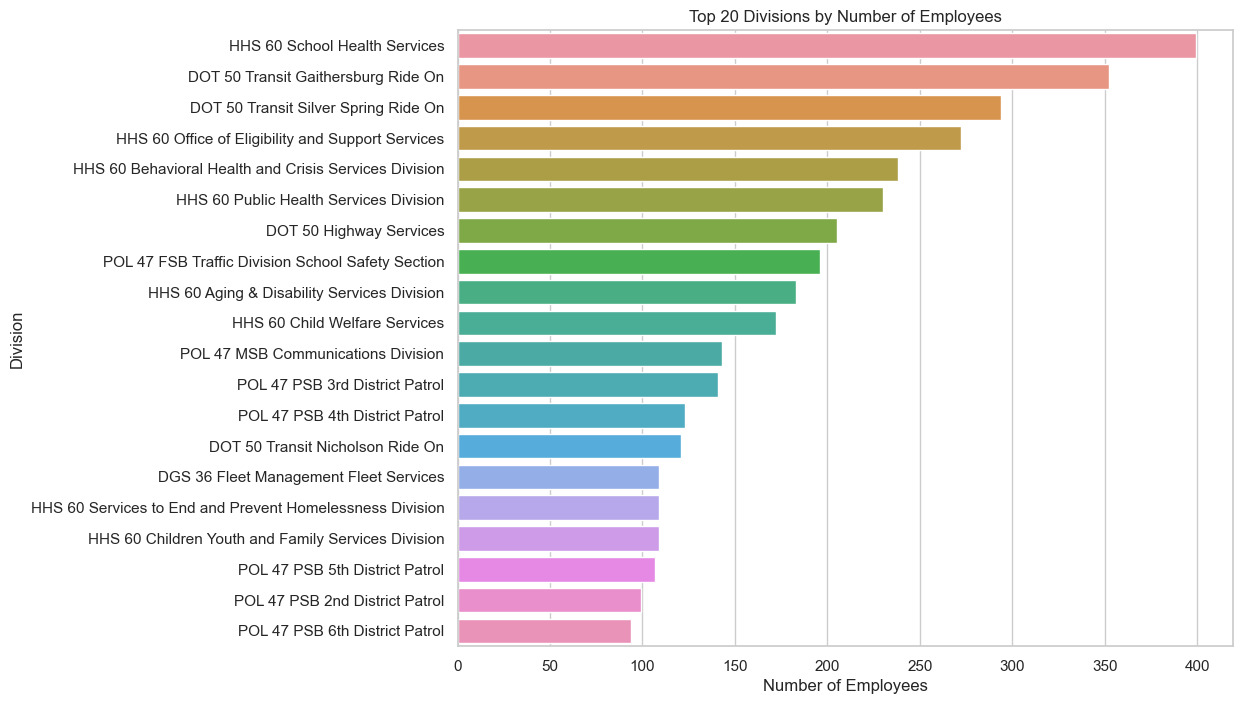

In [91]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid", palette="pastel")

# Bar Plot for Division (top 20 divisions by frequency)
top_divisions = df['Division'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_divisions.values, y=top_divisions.index)
plt.title('Top 20 Divisions by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Division')
plt.show()


+ Similar to departments, this gives a clearer view of which divisions within those departments are the largest in terms of employee count. It shows that HHS 60 School Health Services division has the highest number of employees.

#### Distribution of Employees by Gender

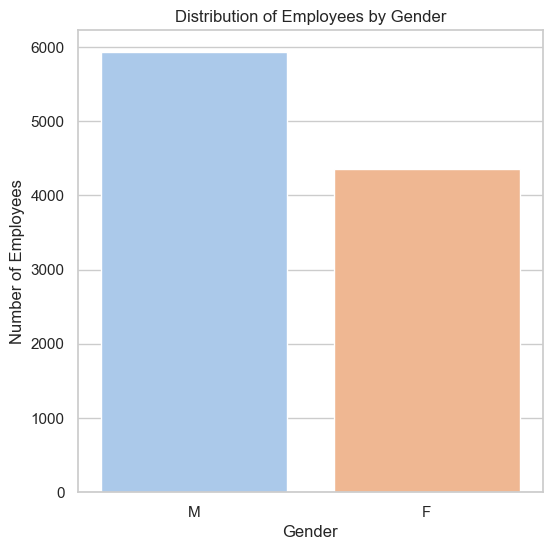

In [92]:
# Bar Plot for Gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()


+ This analysis provides a visual representation of the gender distribution across the organization. It shows that Male employees are more than Female employees.

#### Longevity Pay by Top 10 Departments

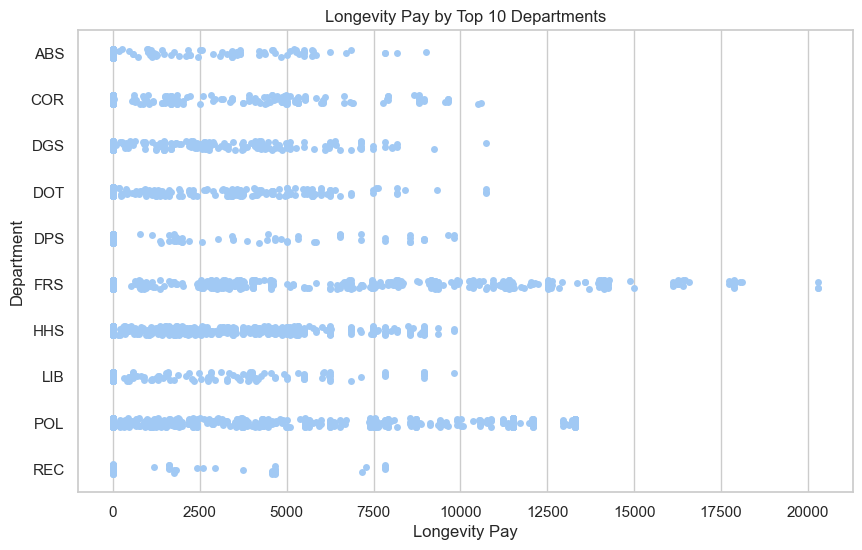

In [93]:
top_departments_longevity = df['Department'].value_counts().nlargest(10).index
filtered_data_longevity = df[df['Department'].isin(top_departments_longevity)]

plt.figure(figsize=(10, 6))
sns.stripplot(x='Longevity_Pay', y='Department', data=filtered_data_longevity, jitter=True)
plt.title('Longevity Pay by Top 10 Departments')
plt.xlabel('Longevity Pay')
plt.ylabel('Department')
plt.show()


+ The analysis indicates varying degrees of longevity pay across departments. Some departments show a wide spread of longevity pay, while others have more clustered distributions, mostly near the lower end of the scale.
+ Departments with a wider range of longevity pay might have more established among employees, suggesting different policies or scales for rewarding longevity.

#### Overtime Pay by Top 10 Departments

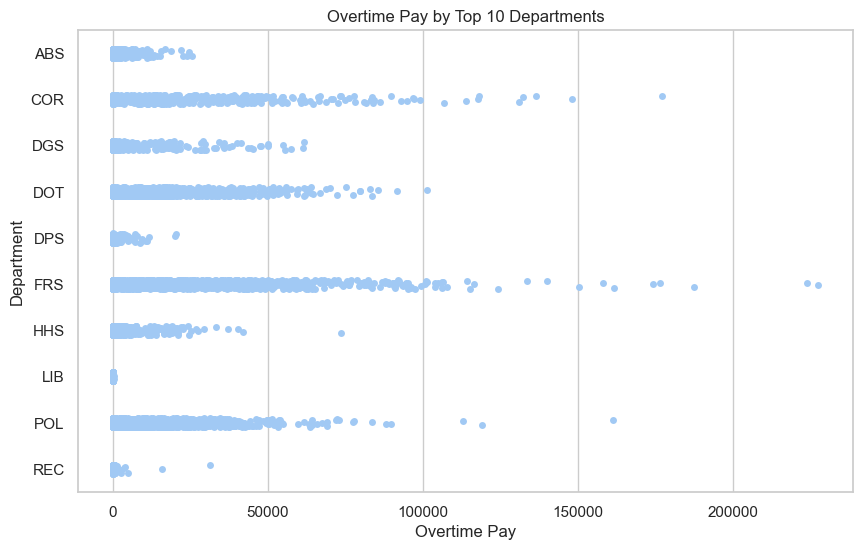

In [94]:
top_departments_overtime = df['Department'].value_counts().nlargest(10).index
filtered_data_overtime = df[df['Department'].isin(top_departments_overtime)]

plt.figure(figsize=(10, 6))
sns.stripplot(x='Overtime_Pay', y='Department', data=filtered_data_overtime, jitter=True)
plt.title('Overtime Pay by Top 10 Departments')
plt.xlabel('Overtime Pay')
plt.ylabel('Department')
plt.show()


+ Similar to longevity pay, overtime pay also varies widely across departments. Some departments have a broad distribution of overtime pay, while others are tightly grouped near zero.
+ Departments with higher and more varied overtime payments might be more operationally intense or have periodic demands that necessitate overtime work.
+ Departments with low overtime pay might either have better workload management, less fluctuating demand, or strict policies limiting overtime.

##### Comparison of Average Longevity Pay and Overtime Pay by Top 10 Departments

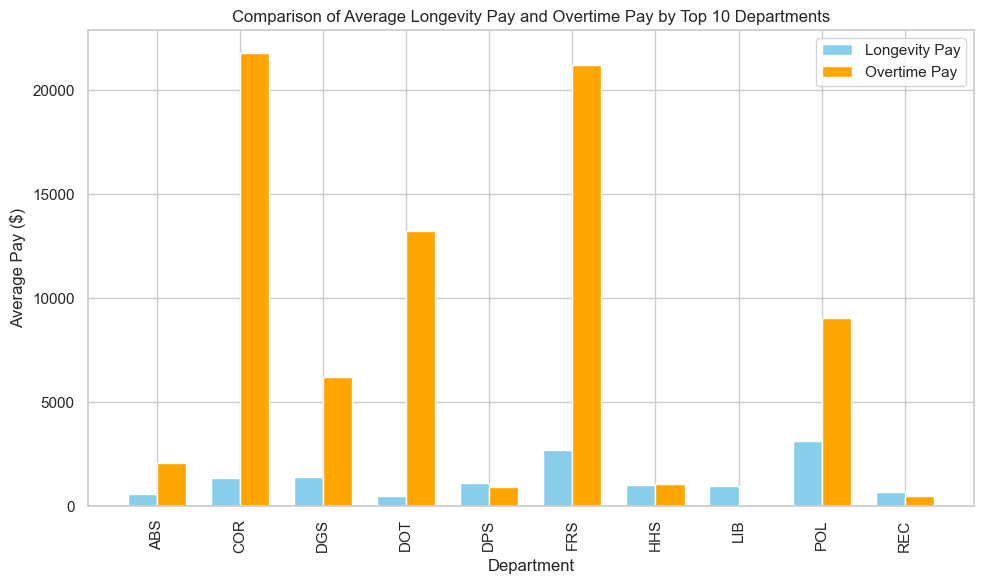

In [95]:
# Calculating the mean longevity and overtime pay for the top 10 departments
top_departments = df['Department'].value_counts().nlargest(10).index
department_data = df[df['Department'].isin(top_departments)]
mean_pays = department_data.groupby('Department').agg({'Longevity_Pay':'mean', 'Overtime_Pay':'mean'}).reset_index()

# Creating a grouped bar chart for Longevity Pay and Overtime Pay by Department
plt.figure(figsize=(10, 6))
x = range(len(mean_pays['Department']))
width = 0.35

plt.bar(x, mean_pays['Longevity_Pay'], width=width, label='Longevity Pay', color='skyblue')
plt.bar([p + width for p in x], mean_pays['Overtime_Pay'], width=width, label='Overtime Pay', color='orange')

plt.xlabel('Department')
plt.ylabel('Average Pay ($)')
plt.title('Comparison of Average Longevity Pay and Overtime Pay by Top 10 Departments')
plt.xticks([p + width / 2 for p in x], mean_pays['Department'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


+ The analysis shows notable differences between the average longevity pay and overtime pay across departments. Some departments have higher average longevity pay while others have higher overtime pay.
+ Departments with high overtime pay generally have lower longevity pay, and vice versa. This might suggest different operational or compensation strategies, where some departments rely more on overtime due to the nature of the work, whereas others may offer incentives for long-term service.
+ The presence of high overtime pay in some departments could also indicate more irregular hours or peak season workloads that require additional staffing hours.

### Linear Regression

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data for the Linear Regression Model
# Selecting features and target variable
features = df[['Department', 'Gender', 'Longevity_Pay', 'Overtime_Pay', 'Grade']]
target = df['Base_Salary']

# Encoding categorical data and setting up the pipeline for transformation and regression
categorical_features = ['Department', 'Gender', 'Grade']
numeric_features = ['Longevity_Pay', 'Overtime_Pay']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Updating the OneHotEncoder to handle unknown categories by ignoring them
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Re-creating the linear regression model pipeline with updated preprocessor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Training the model with the updated setup
model.fit(X_train, y_train)

# Predicting the test set results with the updated model
y_pred = model.predict(X_test)

# Evaluating the model with the updated setup
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error:", mse)
print("R-Squared Score:", r2)


Mean Square Error: 135467855.23698863
R-Squared Score: 0.8620262659720386


In [97]:
# Making a few sample predictions using the trained model
# Displaying a few sample entries from the test set and their predicted salaries
sample_test_data = X_test.sample(5, random_state=1)
sample_test_predictions = model.predict(sample_test_data)

# Displaying the actual vs predicted values for these samples
sample_actual_vs_predicted = pd.DataFrame({
    'Actual Base Salary': y_test.loc[sample_test_data.index],
    'Predicted Base Salary': sample_test_predictions
})

sample_actual_vs_predicted


,Actual Base Salary,Predicted Base Salary
3169,72017.0000,74806.049665
2252,53214.6496,63534.716457
5766,107367.0000,98738.273377
7131,52400.0835,42701.972587
8284,108084.0000,111262.544045


#### Analysis:
+ The model predictions are fairly close to the actual values in most cases, suggesting that the model is reasonably accurate.
+ However, there are discrepancies, such as in entry 7131, where the predicted salary is significantly lower than the actual salary. 

### High Salary Classification using Logistic Regression

- The logistic regression model used in the demonstration is designed to classify employees based on whether their salary is above a certain threshold, defined as the 75th percentile of the base salary distribution. 
+ This binary classification task categorizes employees into "high salary" and "not high salary" groups.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay

# Step 1: Define the binary target variable for high salary classification
salary_threshold = df['Base_Salary'].quantile(0.75)
df['High_Salary'] = (df['Base_Salary'] > salary_threshold).astype(int)

# Feature selection and preparation as before
features = df[['Department', 'Gender', 'Longevity_Pay', 'Overtime_Pay', 'Grade']]
target = df['High_Salary']

# Create logistic regression model
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=0))])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Training the model
logistic_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

print('Accuracy',accuracy)


Accuracy 0.8003885381253035


In [106]:
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1624
           1       0.67      0.11      0.19       435

    accuracy                           0.80      2059
   macro avg       0.74      0.55      0.54      2059
weighted avg       0.78      0.80      0.74      2059



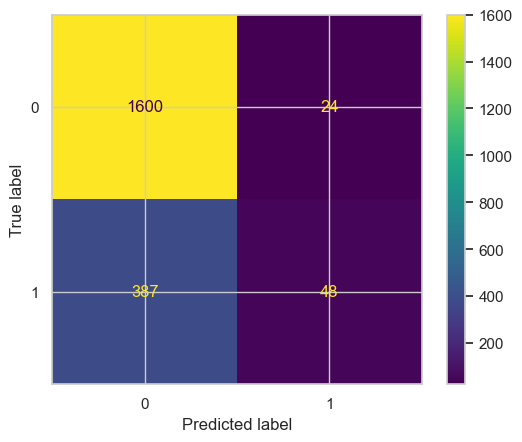

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

+ True Negatives (TN): 1600 - The model correctly predicted 'Not High Salary' for 1600 cases.
+ False Positives (FP): 24 - The model incorrectly predicted 'High Salary' for 24 cases that were actually not high salary.
+ False Negatives (FN): 387 - The model incorrectly predicted 'Not High Salary' for 387 cases that were actually high salary.
+ True Positives (TP): 48 - The model correctly predicted 'High Salary' for 48 cases.

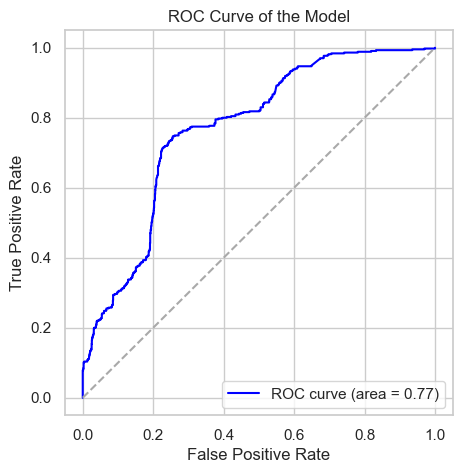

In [100]:
from sklearn.metrics import roc_curve

# Generating the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plotting the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Model')
plt.legend(loc="lower right")
plt.show()


#### Random Forest and Decision Tree Algorithms

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Setting up the Random Forest Classifier
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))
])

# Training the Random Forest model
random_forest_model.fit(X_train, y_train)

# Predicting with the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Setting up the Decision Tree Classifier
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Training the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Predicting with the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

#### Reports of Random Forest Algorithm

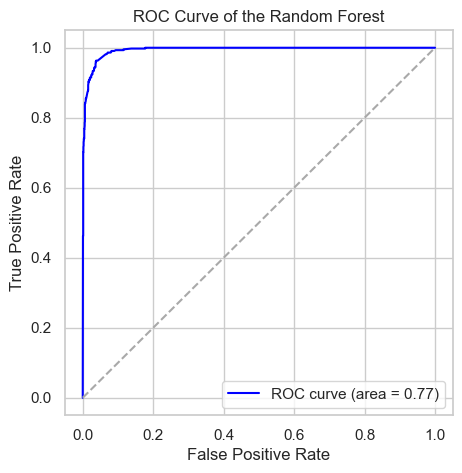

In [114]:
# Generating the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plotting the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Random Forest')
plt.legend(loc="lower right")
plt.show()

In [107]:
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1624
           1       0.93      0.91      0.92       435

    accuracy                           0.97      2059
   macro avg       0.95      0.94      0.95      2059
weighted avg       0.97      0.97      0.97      2059



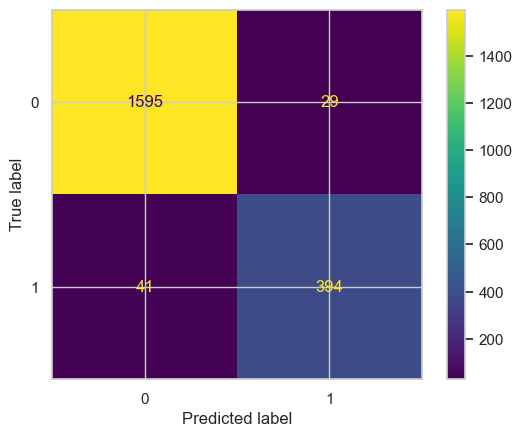

In [103]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest_model.classes_)
disp.plot()
plt.show()

- True Negatives (TN) = 1595: The model correctly predicted 'Not High Salary' for 1595 cases.
- False Positives (FP) = 29: The model incorrectly predicted 'High Salary' for 29 cases that were actually not high salary.
- False Negatives (FN) = 41: The model incorrectly predicted 'Not High Salary' for 41 cases that were actually high salary.
- True Positives (TP) = 394: The model correctly predicted 'High Salary' for 394 cases.

#### Reports of Decision Tree Algorithm

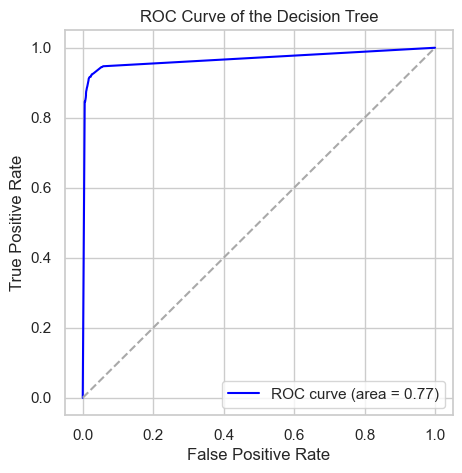

In [112]:
# Generating the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plotting the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [109]:
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1624
           1       0.94      0.91      0.92       435

    accuracy                           0.97      2059
   macro avg       0.96      0.95      0.95      2059
weighted avg       0.97      0.97      0.97      2059



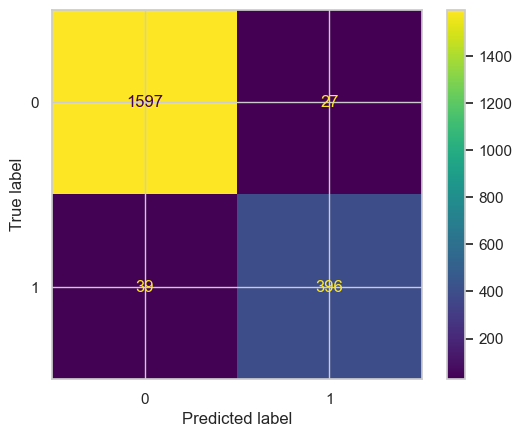

In [104]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=decision_tree_model.classes_)
disp.plot()
plt.show()

- True Negatives (TN) = 1597: The model correctly predicted 'Not High Salary' for 1595 cases.
- False Positives (FP) = 27: The model incorrectly predicted 'High Salary' for 29 cases that were actually not high salary.
- False Negatives (FN) = 39: The model incorrectly predicted 'Not High Salary' for 41 cases that were actually high salary.
- True Positives (TP) = 396: The model correctly predicted 'High Salary' for 394 cases.